#MY FIRST ML PROJECT


## LOAD DATA

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/elect demand.csv')
print(df.columns)
print(df.head())



Index(['date_1', 'day', 'month', 'year', 'temp2(c)', 'temp2_max(c)',
       'temp2_min(c)', 'temp2_ave(c)', 'suface_pressure(pa)',
       'wind_speed50_max(m/s)', 'wind_speed50_min(m/s)',
       'wind_speed50_ave(m/s)', 'prectotcorr', 'total_demand(mw)', 'date_2',
       'max_generation(mw)'],
      dtype='object')
       date_1  day  month  year  temp2(c)  temp2_max(c)  temp2_min(c)  \
0  01/01/2018    1      1  2018     19.11         24.48         13.78   
1  02/01/2018    2      1  2018     18.24         23.16         15.28   
2  03/01/2018    3      1  2018     15.78         22.65         11.52   
3  04/01/2018    4      1  2018     13.78         20.32          8.19   
4  05/01/2018    5      1  2018     13.87         20.79          8.24   

   temp2_ave(c)  suface_pressure(pa)  wind_speed50_max(m/s)  \
0        19.130               101.08                   5.05   
1        19.220               100.94                   6.20   
2        17.085               101.12                   

##DATA PREPARATION
######DATA SEPERATION AS X AND Y

In [ ]:

df['date_1'] = pd.to_datetime(df['date_1'], format='%d/%m/%Y', errors='coerce')
df['date_2'] = pd.to_datetime(df['date_2'], format='%d/%m/%Y', errors='coerce')
df['date_1_day'] = df['date_1'].dt.day
df['date_1_month'] = df['date_1'].dt.month
df['date_1_year'] = df['date_1'].dt.year

df['date_2_day'] = df['date_2'].dt.day
df['date_2_month'] = df['date_2'].dt.month
df['date_2_year'] = df['date_2'].dt.year
df.drop(['date_1', 'date_2'], axis=1, inplace=True)
# Step 1: Drop rows where either x or y is NaN
df_cleaned = df.dropna()

# Step 2: Separate features and label
x = df_cleaned.drop('total_demand(mw)', axis=1)
y = df_cleaned['total_demand(mw)']



####datasplit

In [ ]:
x_train

,day,month,year,temp2(c),temp2_max(c),temp2_min(c),temp2_ave(c),suface_pressure(pa),wind_speed50_max(m/s),wind_speed50_min(m/s),wind_speed50_ave(m/s),prectotcorr,max_generation(mw),date_1_day,date_1_month,date_1_year,date_2_day,date_2_month,date_2_year
1647,6,7,2022,27.88,29.76,26.35,28.055,100.26,6.62,4.70,5.660,14.23,13614.0,6,7,2022,6,7,2022
928,17,7,2020,29.12,32.13,26.56,29.345,100.14,6.31,3.84,5.075,2.54,11543.0,17,7,2020,17,7,2020
1756,23,10,2022,24.90,28.12,22.32,25.220,101.02,4.73,1.84,3.285,10.92,11939.0,23,10,2022,23,10,2022
118,29,4,2018,26.54,30.36,23.14,26.750,100.52,8.73,3.95,6.340,59.54,7807.0,29,4,2018,29,4,2018
750,21,1,2020,15.12,20.68,9.28,14.980,101.73,4.05,2.51,3.280,0.00,9009.0,21,1,2020,21,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,21,3,2018,27.40,35.10,19.08,27.090,100.76,4.71,0.45,2.580,0.00,9714.0,21,3,2018,21,3,2018
1931,16,4,2023,34.19,42.45,26.45,34.450,100.38,5.65,1.39,3.520,0.00,14599.0,16,4,2023,16,4,2023
1911,27,3,2023,28.75,34.73,23.08,28.905,100.65,7.94,0.97,4.455,0.36,12072.0,27,3,2023,27,3,2023
816,27,3,2020,28.53,35.52,20.73,28.125,100.91,5.25,0.87,3.060,0.00,9834.0,27,3,2020,27,3,2020


In [ ]:
x_test

,day,month,year,temp2(c),temp2_max(c),temp2_min(c),temp2_ave(c),suface_pressure(pa),wind_speed50_max(m/s),wind_speed50_min(m/s),wind_speed50_ave(m/s),prectotcorr,max_generation(mw),date_1_day,date_1_month,date_1_year,date_2_day,date_2_month,date_2_year
961,19,8,2020,27.86,30.28,26.26,28.270,99.79,9.12,6.00,7.560,5.43,11429.0,19,8,2020,19,8,2020
913,2,7,2020,28.67,30.80,26.76,28.780,99.93,6.20,4.45,5.325,4.11,12032.0,2,7,2020,2,7,2020
1162,8,3,2021,26.19,33.20,20.12,26.660,101.13,6.18,0.60,3.390,0.54,11416.0,8,3,2021,8,3,2021
457,3,4,2019,27.62,34.62,21.08,27.850,100.81,7.55,1.80,4.675,1.59,9252.0,3,4,2019,3,4,2019
953,11,8,2020,28.98,31.29,26.83,29.060,99.94,6.77,3.93,5.350,13.02,12246.0,11,8,2020,11,8,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,16,2,2019,22.49,29.10,17.61,23.355,101.25,6.14,1.79,3.965,1.21,8838.0,16,2,2019,16,2,2019
1712,9,9,2022,29.00,31.69,26.79,29.240,100.60,4.86,0.93,2.895,17.98,12912.0,9,9,2022,9,9,2022
882,1,6,2020,28.40,31.23,25.83,28.530,100.61,7.05,3.81,5.430,4.15,9834.0,1,6,2020,1,6,2020
1733,30,9,2022,29.05,33.18,24.89,29.035,100.29,5.27,1.51,3.390,0.67,13010.0,30,9,2022,30,9,2022


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)


##BUILD MODEL


###LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

#####Applying model to make prediction

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred=lr.predict(x_test)

In [ ]:
y_lr_train_pred

array([12988.09248524, 11527.78930948, 11445.73282029, ...,
       11515.19967326,  9819.84006124, 11577.94473231])

In [ ]:
y_lr_test_pred

array([11434.4655663 , 11900.06482504, 11058.4586961 ,  9499.92631935,
       12078.77493289, 13218.37037829, 11831.37380893, 13015.55194093,
       10509.32236949,  9309.27567434, 10766.91193628,  8493.66335394,
        9817.11621793, 12475.84520561,  8051.26810934,  9359.35464944,
       11515.38167749,  8704.86660541,  9043.8769723 , 10173.58996759,
        8012.61179259,  9599.34979271, 12786.57540999,  9129.24954376,
       11421.85155584, 12224.14670408,  9504.58251446, 11155.20940822,
        8334.00016749, 10090.48971145, 11482.94274888,  9055.64421818,
       10048.3814774 ,  8364.75783145, 10665.09717979, 10993.23565904,
       11161.08659293,  8658.06902544, 11892.32856851,  8263.70480629,
       10431.44850085,  8209.92429264, 12284.76931133, 11187.72518824,
       11670.31581053,  9715.86381418, 11454.10677158,  8670.64807368,
        9304.02603961, 11088.61743049, 12377.5172252 ,  9385.85641024,
       11556.0930814 ,  8136.5025619 ,  8834.86077872, 11444.56932625,
      

#####Evaluate model performance

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
lr_train_mse=mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2=r2_score(y_train,y_lr_train_pred)
lr_test_mse=mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2=r2_score(y_test,y_lr_test_pred)

In [ ]:
print('LR MSE TRAIN:',lr_train_mse)
print('LR r2 TRAIN:',lr_train_r2)
print('LR MSE Test:',lr_test_mse)
print('LR r2 Test:',lr_test_r2)


LR MSE TRAIN: 292897.39586198394
LR r2 TRAIN: 0.8969880161581608
LR MSE Test: 263111.5315719373
LR r2 Test: 0.9012488431921512


In [ ]:
lr_results=pd.DataFrame(['Linear regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns=['Method','Training MSE','Training R2','Testing MSE','Testing R2']

In [ ]:
lr_results

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear regression,292897.395862,0.896988,263111.531572,0.901249


####VISUALIZE

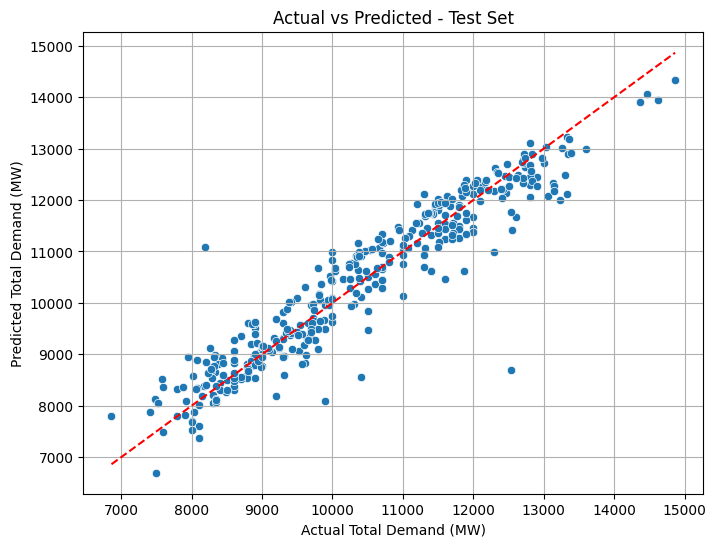

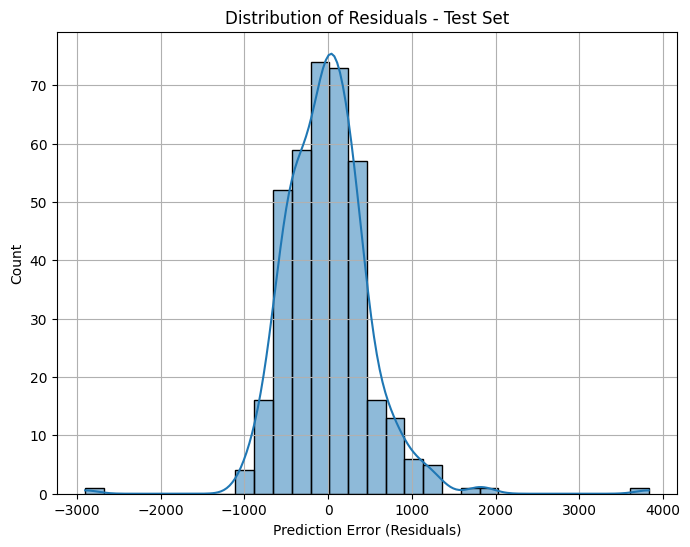

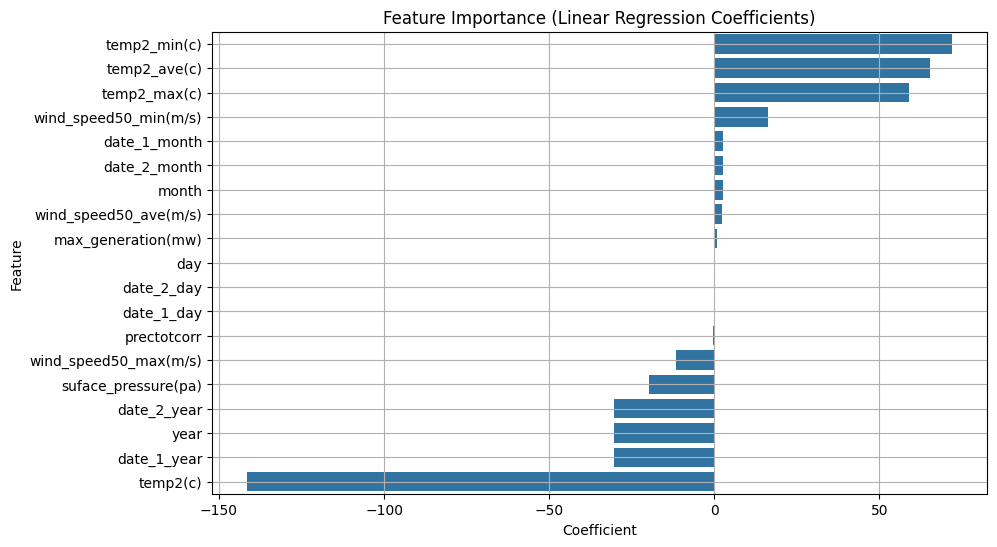

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Actual vs Predicted Plot (TEST SET)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_lr_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual Total Demand (MW)")
plt.ylabel("Predicted Total Demand (MW)")
plt.title("Actual vs Predicted - Test Set")
plt.grid(True)
plt.show()

# 2. Residual Plot (TEST SET)
residuals = y_test - y_lr_test_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Prediction Error (Residuals)")
plt.title("Distribution of Residuals - Test Set")
plt.grid(True)
plt.show()

# 3. Feature Coefficients (Impact of each feature)
coeff_df = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=coeff_df, x='Coefficient', y='Feature')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.grid(True)
plt.show()


###RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
'''not classifier coz y is a quantitative value and not a categorcal value'''
rf=RandomForestRegressor(max_depth=2,random_state=100)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

#####Applying model to make prediction

In [ ]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred=rf.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
rf_train_mse=mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2=r2_score(y_train,y_rf_train_pred)
rf_test_mse=mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2=r2_score(y_test,y_rf_test_pred)

In [ ]:
rf_results=pd.DataFrame(['Linear regression',rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns=['Method','Training MSE','Training R2','Testing MSE','Testing R2']
rf_results

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear regression,455536.92784,0.839788,427145.79625,0.839683


##MODEL COMPARISON

In [ ]:
df_models=pd.concat([lr_results,rf_results],axis=0)
'''axis=0 means row wise else col wise for 1'''
df_models

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear regression,292897.395862,0.896988,263111.531572,0.901249
0,Linear regression,455536.92784,0.839788,427145.79625,0.839683


In [ ]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear regression,292897.395862,0.896988,263111.531572,0.901249
1,Linear regression,455536.92784,0.839788,427145.79625,0.839683


#DATA VISUALIZATION OF PREDICTION RESULTS

Text(0.5, 0, 'Actual TOTAL DEMAND')

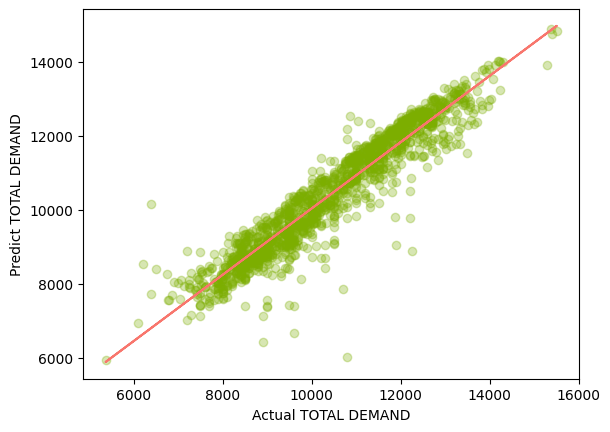

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(x=y_train,y=y_lr_train_pred,c="#7CAE00",alpha=0.3)
z=np.polyfit(y_train,y_lr_train_pred,1)
p=np.poly1d(z)
plt.plot(y_train,p(y_train),'#F8766D')
plt.ylabel('Predict TOTAL DEMAND')
plt.xlabel('Actual TOTAL DEMAND')